# Sentiment Analysis of Airbnb Reviews 🏠

## Introduction:

The project is a deep learning work that focuses on conducting sentiment analysis on Airbnb reviews to extract valuable insights regarding guest sentiments and experiences. Sentiment analysis, a branch of natural language processing, enables the classification of text data into positive, negative, or neutral sentiments. Leveraging advanced deep learning techniques, the project aims to uncover nuanced sentiment patterns within the reviews, offering deeper insights into customer sentiments and preferences

## Exploratory Data Analysis (EDA):
The project commences with an in-depth exploratory data analysis (EDA) of the Airbnb reviews dataset. Through statistical analyses and visualizations, the EDA phase aims to uncover patterns, distributions, and common themes within the reviews.

## Word2Vec Embedding:
Following the EDA, the project employs Word2Vec embedding to represent words in a continuous vector space. Word2Vec facilitates capturing semantic relationships between words, thereby enhancing the understanding of contextual similarities and differences.

## Clustering (KMeans) for Unlabeled Data:
Given the absence of labeled sentiment data in the dataset, the project utilizes clustering techniques, specifically KMeans clustering, to group similar reviews together based on their semantic similarities. Clustering enables the identification of distinct clusters within the unlabeled dataset, providing a foundation for subsequent sentiment analysis.

## Sentiment Analysis with Sentiment Intensity Analyzer (SIA):
In addition to Word2Vec embedding and clustering, the project incorporates sentiment analysis using the Sentiment Intensity Analyzer (SIA). SIA quantifies sentiment expression within each cluster, assigning sentiment scores to individual reviews and computing an overall sentiment score for the cluster.

## Interpreting the Results:
The numbers represent the average sentiment score for each cluster, both for the training and test datasets. The sentiment score ranges from -1 to 1, where:

A score close to 1 indicates a highly positive sentiment.
A score close to -1 indicates a highly negative sentiment.
A score around 0 indicates a neutral sentiment.
Here's the breakdown of the results:

Cluster 0: This cluster has a high average sentiment score, indicating that the sentences within this cluster are predominantly positive in sentiment. Both the training and test datasets show similar sentiment scores, indicating consistency.
Cluster 1: Similar to Cluster 0, this cluster also has a high average sentiment score, indicating predominantly positive sentiment. The sentiment scores for both the training and test datasets are close, suggesting consistency.
Cluster 2: This cluster has a relatively low average sentiment score, closer to 0. This indicates that the sentences within this cluster are neutral or mildly positive. Both the training and test datasets show similar sentiment scores.
Cluster 3: The average sentiment score for this cluster is low, suggesting mildly negative sentiment. Both the training and test datasets have similar sentiment scores.
Cluster 4: This cluster has the lowest average sentiment score among all clusters, indicating predominantly negative sentiment. Both the training and test datasets exhibit similarly low sentiment scores.

In summary, by analyzing the average sentiment scores for each cluster, we can understand the overall sentiment tendencies within the clusters. This information can provide insights into the sentiment distribution across different segments of the data.


## Conclusion:

The sentiment analysis of Airbnb reviews using Word2Vec embedding, clustering (KMeans), and Sentiment Intensity Analyzer (SIA) yields valuable insights into guest sentiments and experiences. Through the analysis, we were able to categorize reviews into distinct clusters based on semantic similarities and quantify the sentiment expression within each cluster. The project demonstrates the effectiveness of unsupervised learning techniques, particularly clustering, in extracting meaningful patterns from unlabeled text data and providing a comprehensive understanding of sentiment distribution.

## Benefits:

1. **Customer Insights**: The sentiment analysis provides valuable insights into customer sentiments, preferences, and experiences, enabling Airbnb to better understand guest satisfaction levels and identify areas for improvement.

2. **Personalized Recommendations**: By categorizing reviews into clusters, Airbnb can tailor recommendations and suggestions to individual guests based on their preferences and sentiments expressed in similar reviews.

3. **Enhanced Customer Engagement**: Understanding the sentiment distribution across different clusters allows Airbnb to engage with customers more effectively, addressing concerns, and responding to feedback in a timely manner.

4. **Product and Service Enhancement**: The analysis highlights both positive and negative aspects of the Airbnb experience, enabling the company to enhance its offerings, improve service quality, and optimize customer satisfaction.

5. **Data-Driven Decision Making**: Leveraging insights from sentiment analysis, Airbnb can make data-driven decisions regarding marketing strategies, product development, and customer relationship management, leading to improved business outcomes.

In conclusion, the sentiment analysis of Airbnb reviews offers actionable insights and strategic advantages for Airbnb to enhance customer experiences, drive customer loyalty, and optimize business performance in the competitive hospitality industry.




## 1. EDA - Exploratory Data Analysis

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# connecting to google drive, where my data is allocated
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
df_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirBnBProject/reviews.csv")

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
df_reviews.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342904 entries, 0 to 342903
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     342904 non-null  float64
 1   id             342904 non-null  float64
 2   date           342904 non-null  object 
 3   reviewer_id    342904 non-null  int64  
 4   reviewer_name  342904 non-null  object 
 5   comments       342888 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 15.7+ MB


**About the dataset:** In total, there are 342904 reviews on the data to analyze.

In [6]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
df_reviews.head()


First few rows of the dataset:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818.0,1191.0,3/30/2009,10952,Lam,Daniel is really cool. The place was nice and ...
1,515749.0,1671407.0,7/9/2012,2640670,Gregory,If you want the authentic Amsterdam houseboat ...
2,515749.0,1715674.0,7/15/2012,1032804,Michael,Unique and luxurious to be sure. I couldn't re...
3,2818.0,1771.0,4/24/2009,12798,Alice,Daniel is the most amazing host! His place is ...
4,515749.0,1963378.0,8/12/2012,503786,Brian,My wife and I recently stopped in Amsterdam fo...


In [7]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df_reviews.describe()


Summary statistics of numerical columns:


,listing_id,id,reviewer_id
count,3.429040e+05,3.429040e+05,3.429040e+05
mean,6.478685e+15,1.561403e+17,1.183357e+08
std,6.292660e+16,2.607990e+17,1.181510e+08
min,2.818000e+03,1.191000e+03,1.041000e+03
25%,3.724060e+06,1.941558e+08,2.615132e+07
50%,1.346011e+07,4.508779e+08,7.477861e+07
75%,2.512124e+07,4.250678e+17,1.764185e+08
max,7.054480e+17,7.107280e+17,4.780576e+08


In [8]:
# Check for missing values
print("\nMissing values:")
print(df_reviews.isnull().sum())


Missing values:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         16
dtype: int64


In [9]:
# Drop rows with missing comments
df_reviews = df_reviews.dropna(subset=['comments'])

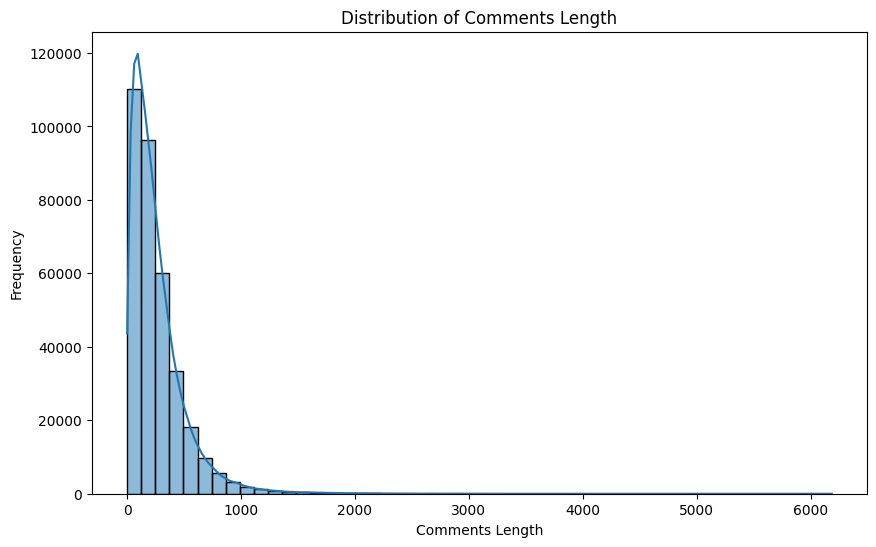

In [10]:
# Explore distribution of 'comments' length

# Compute comments length
df_reviews['comments_length'] = df_reviews['comments'].apply(lambda x: len(str(x)))

# Plot the distribution of comments length
plt.figure(figsize=(10,6))
sns.histplot(df_reviews['comments_length'], bins=50, kde=True)
plt.title('Distribution of Comments Length')
plt.xlabel('Comments Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# new df_reviews with comments_length column:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_length
0,2818.0,1.191000e+03,3/30/2009,10952,Lam,Daniel is really cool. The place was nice and ...,250
1,515749.0,1.671407e+06,7/9/2012,2640670,Gregory,If you want the authentic Amsterdam houseboat ...,1814
2,515749.0,1.715674e+06,7/15/2012,1032804,Michael,Unique and luxurious to be sure. I couldn't re...,930
3,2818.0,1.771000e+03,4/24/2009,12798,Alice,Daniel is the most amazing host! His place is ...,334
4,515749.0,1.963378e+06,8/12/2012,503786,Brian,My wife and I recently stopped in Amsterdam fo...,669
...,...,...,...,...,...,...,...
342899,40606723.0,6.997740e+17,8/23/2022,199478251,Hugo,Excelente ubicación,19
342900,40606723.0,6.998450e+17,8/23/2022,168768099,Cerys,"Would definitely recommend. Perfect location, ...",331
342901,40606723.0,7.004880e+17,8/24/2022,118306945,Anita,"Hôtel bien situé, personnel d’accueil chaleure...",327
342902,40606723.0,7.004940e+17,8/24/2022,403631092,Tos,Sehr freundliche Personal. Vom Hotel aus kann ...,211


<ipython-input-12-0197f013ae1a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df_reviews, palette='viridis')


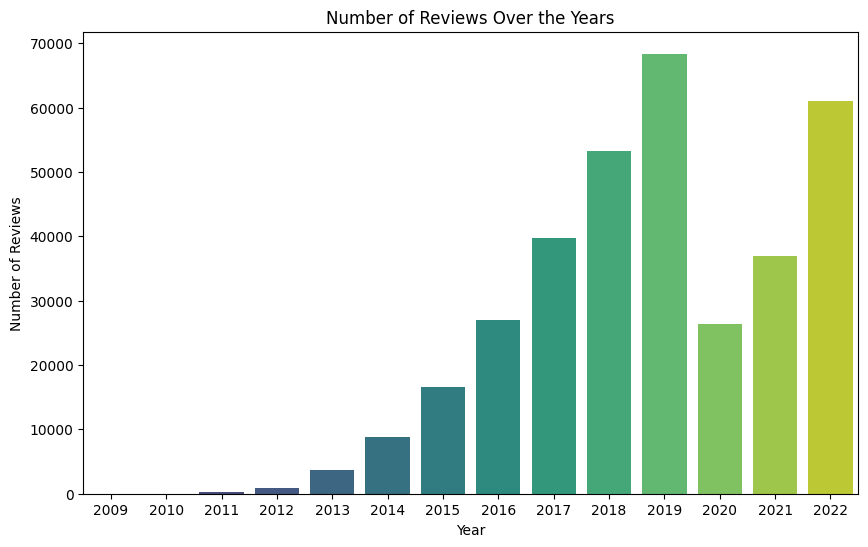

<ipython-input-12-0197f013ae1a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df_reviews, palette='viridis')


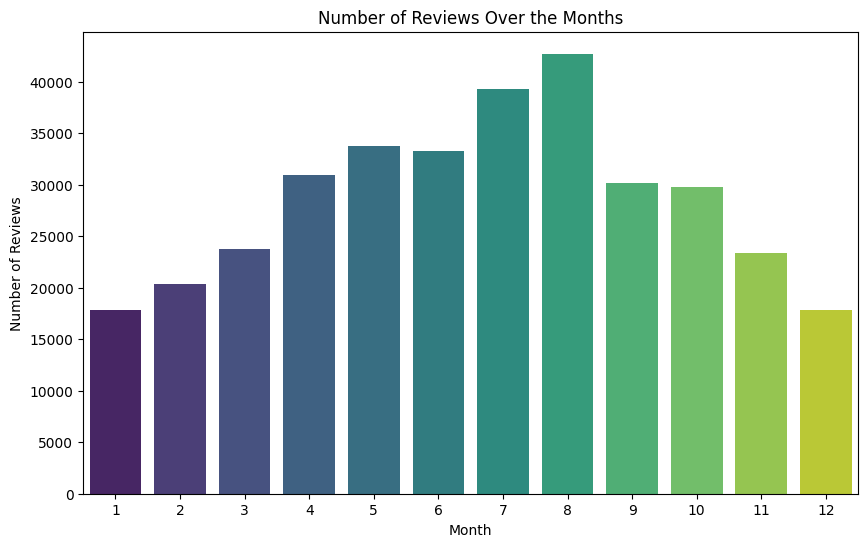

In [12]:
# Explore the distribution of reviews over time
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews['year'] = df_reviews['date'].dt.year
df_reviews['month'] = df_reviews['date'].dt.month

# Number of reviews over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_reviews, palette='viridis')
plt.title('Number of Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Number of reviews over the months
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_reviews, palette='viridis')
plt.title('Number of Reviews Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

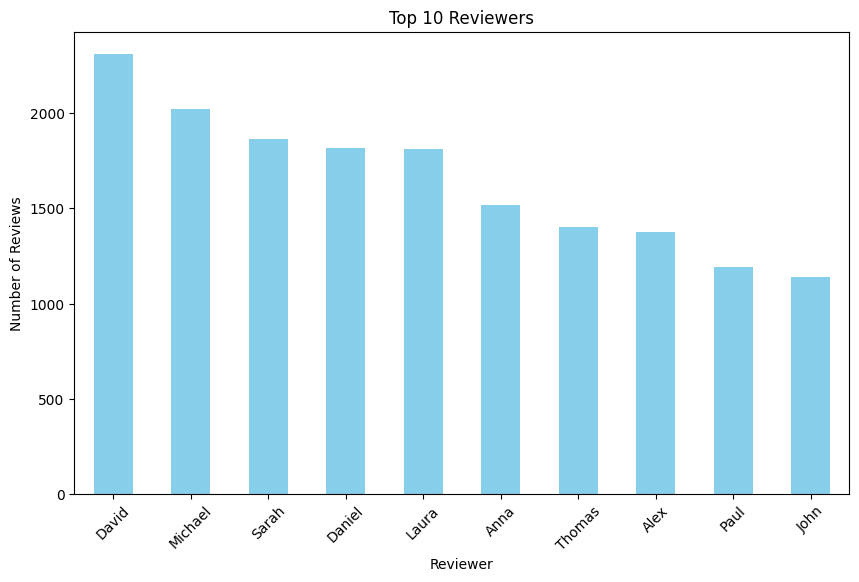

In [13]:
# Explore the top reviewers
top_reviewers = df_reviews['reviewer_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_reviewers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

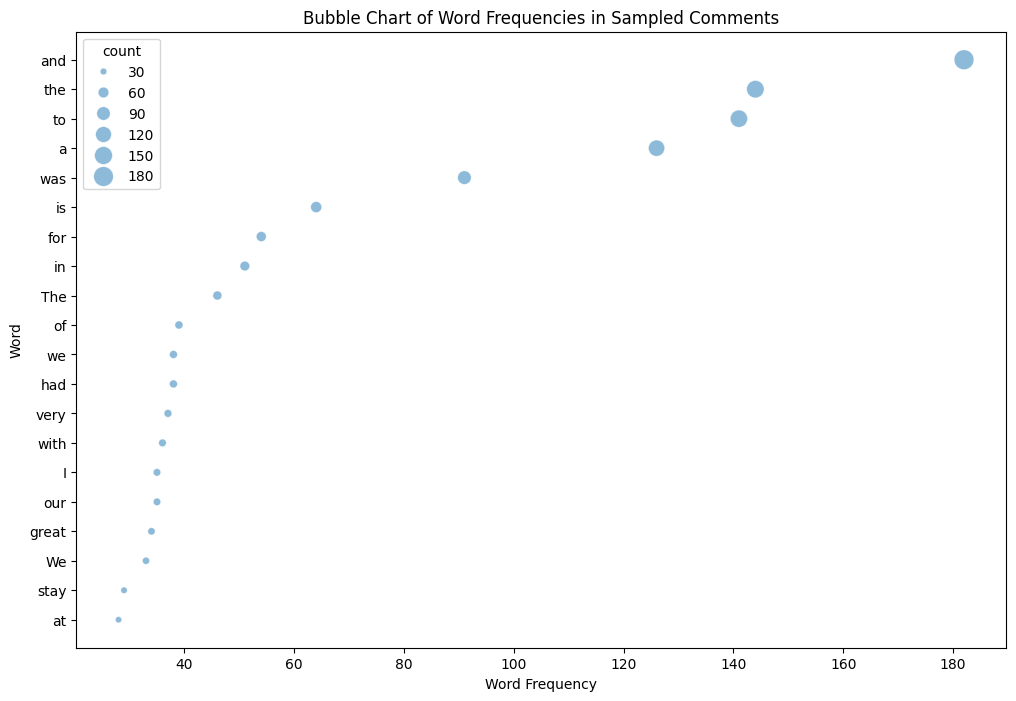

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for this parte, I needed to select a sample size due to RAM constraints.
# If your computer has more power, feel free to change the code and use the entire dataset.

# Specify the desired sample size
sample_size = 100  # Adjust this value based on your memory constraints and analysis needs

# Randomly sample the DataFrame
sampled_df = df_reviews.sample(n=sample_size, random_state=42)  # Setting a random state for reproducibility

# Calculate word frequencies
word_counts = sampled_df['comments'].str.split(expand=True).stack().value_counts()

# Convert word counts to DataFrame
word_counts_df = pd.DataFrame({'word': word_counts.index, 'count': word_counts.values})

# Plot bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=word_counts_df.head(20), x='count', y='word', size='count', sizes=(20, 200), alpha=0.5)
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.title('Bubble Chart of Word Frequencies in Sampled Comments')
plt.show()


We can see that this analysis of most common words does not lead to much knowledge about the words cause we haven't done embedding or tokenization. Next, I am going to dive into this matter.  

## 2. Sentiment Analysis

Starting with sentiment analysis, we use embedding techniques to represent text data in a format suitable for sentiment classification. Embedding methods like Word2Vec, GloVe, or FastText can capture semantic relationships between words, which can be helpful for sentiment analysis tasks.

Here's a basic outline of steps to start with sentiment analysis using embedding:

1. Preprocess the Text Data: This involves steps like removing punctuation, converting text to lowercase, handling special characters, and removing stopwords. Preprocessing helps clean the text data and makes it more suitable for analysis.

2. Tokenization: Tokenization is the process of breaking down text into individual words or tokens. This step is necessary before applying embedding techniques.

3. Word Embedding: Use pre-trained word embeddings like Word2Vec, GloVe, or FastText to convert each word into a dense vector representation. These embeddings capture semantic relationships between words based on their context in large text corpora.

4. Sentiment Classification Model: Train a machine learning or deep learning model to classify the sentiment of text data based on the word embeddings. You can use techniques like logistic regression, support vector machines, or recurrent neural networks (RNNs) for sentiment classification.

5. Evaluation: Evaluate the performance of your sentiment classification model using metrics like accuracy, precision, recall, or F1-score. You can use techniques like cross-validation or holdout validation to assess the model's generalization performance.



In [16]:
!pip install nltk
!python -m nltk.downloader stopwords
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import tensorflow
from tensorflow.keras.preprocessing.text import text_to_word_sequence


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data_from_reviews(data_path, percentage_of_sentences=None):
    # Extract sentences
    sentences = df_reviews['comments'].tolist()

    # Split the dataset into train and test
    train_sentences, test_sentences = train_test_split(sentences, test_size=0.2, random_state=42)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences > 0 and percentage_of_sentences <= 100)

        len_train = int(percentage_of_sentences / 100 * len(train_sentences))
        train_sentences = train_sentences[:len_train]

        len_test = int(percentage_of_sentences / 100 * len(test_sentences))
        test_sentences = test_sentences[:len_test]

    # Tokenize the sentences
    X_train = [text_to_word_sequence(sentence) for sentence in train_sentences]
    X_test = [text_to_word_sequence(sentence) for sentence in test_sentences]

    return X_train, None, X_test, None

# Example usage:
data_path = "/content/drive/MyDrive/Colab Notebooks/AirBnBProject/reviews.csv"
X_train, _, X_test, _ = load_data_from_reviews(data_path, percentage_of_sentences=10)

Now, let's train a word2vec model (with the arguments that you want) on your training sentence. Store it into the word2vec variable.


**code explained**

- `vector_size=60`: This parameter determines the dimensionality of the word vectors to be generated. In this case, each word will be represented by a vector of length 60.

- `min_count=10`: This parameter specifies the minimum frequency count of words. Words with frequencies lower than this value will be ignored and not included in the vocabulary.

- `window=10`: This parameter sets the maximum distance between the current and predicted word within a sentence. In other words, it defines the size of the context window for generating word embeddings.

In [40]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_train, vector_size=60, min_count=10, window=10)

Let's convert your training and test data into something you can feed into a RNN.

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [42]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])

    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []

    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)

    return embed

# Embed the training and test sentences
X_train_embed = embedding(word2vec, X_train)
X_test_embed = embedding(word2vec, X_test)


# Pad the training and test embedded sentences
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post', maxlen=200)

✅ Good Practice ✅ Such tests are quite important! Not only in this exercise, but in real-life applications. It prevents from finding errors too late and from letting them propagate through the entire notebook.

In [43]:
# TEST ME
for X in [X_train_pad, X_test_pad]:
    assert type(X) == np.ndarray
    assert X.shape[-1] == word2vec.wv.vector_size


assert X_train_pad.shape[0] == len(X_train)
assert X_test_pad.shape[0] == len(X_test)

### 2.1 NLTK SentimentIntensityAnalyzer

We use the NLTK SentimentIntensityAnalyzer to compute the sentiment score for each sentence within each cluster. We then calculate the average sentiment score for both the training and test sentences within each cluster and print the results.

In [ ]:
!pip install transformers

In [50]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer


In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Convert embedded sentences to text
X_train_texts = [' '.join(sentence) for sentence in X_train]
X_test_texts = [' '.join(sentence) for sentence in X_test]

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train_texts)
X_test_vectorized = vectorizer.transform(X_test_texts)

# Perform K-means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_clusters = kmeans.fit_predict(X_train_vectorized)
test_clusters = kmeans.predict(X_test_vectorized)

# Analyze the clusters
# You can analyze the clusters by examining the sentences within each cluster
for cluster_id in range(num_clusters):
    cluster_indices_train = np.where(train_clusters == cluster_id)[0]
    cluster_indices_test = np.where(test_clusters == cluster_id)[0]

    # Extract sentences corresponding to the cluster indices
    train_sentences_cluster = [X_train_texts[i] for i in cluster_indices_train]
    test_sentences_cluster = [X_test_texts[i] for i in cluster_indices_test]

    # Sentiment analysis on training sentences
    train_sentiments = [sia.polarity_scores(sentence)['compound'] for sentence in train_sentences_cluster]
    avg_train_sentiment = np.mean(train_sentiments)

    # Sentiment analysis on test sentences
    test_sentiments = [sia.polarity_scores(sentence)['compound'] for sentence in test_sentences_cluster]
    avg_test_sentiment = np.mean(test_sentiments)

    print(f"Cluster {cluster_id}:")
    print(f"Average sentiment (training): {avg_train_sentiment}")
    print(f"Average sentiment (test): {avg_test_sentiment}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
Average sentiment (training): 0.797963558617413
Average sentiment (test): 0.8019661282660332
Cluster 1:
Average sentiment (training): 0.8935903569089718
Average sentiment (test): 0.8880210405759162
Cluster 2:
Average sentiment (training): 0.14131921206225678
Average sentiment (test): 0.1456208
Cluster 3:
Average sentiment (training): 0.07162506845147551
Average sentiment (test): 0.0595907192575406
Cluster 4:
Average sentiment (training): -0.4150289745354439
Average sentiment (test): -0.43111347305389225


The numbers represent the average sentiment score for each cluster, both for the training and test datasets.

The sentiment score ranges from -1 to 1, where:

A score close to 1 indicates a highly positive sentiment.
A score close to -1 indicates a highly negative sentiment.
A score around 0 indicates a neutral sentiment.

Here's the breakdown of the results:

- Cluster 0: This cluster has a high average sentiment score, indicating that the sentences within this cluster are predominantly positive in sentiment. Both the training and test datasets show similar sentiment scores, indicating consistency.

- Cluster 1: Similar to Cluster 0, this cluster also has a high average sentiment score, indicating predominantly positive sentiment. The sentiment scores for both the training and test datasets are close, suggesting consistency.

- Cluster 2: This cluster has a relatively low average sentiment score, closer to 0. This indicates that the sentences within this cluster are neutral or mildly positive. Both the training and test datasets show similar sentiment scores.

- Cluster 3: The average sentiment score for this cluster is low, suggesting mildly negative sentiment. Both the training and test datasets have similar sentiment scores.

- Cluster 4: This cluster has the lowest average sentiment score among all clusters, indicating predominantly negative sentiment. Both the training and test datasets exhibit similarly low sentiment scores.

In summary, by analyzing the average sentiment scores for each cluster, you can understand the overall sentiment tendencies within the clusters. This information can provide insights into the sentiment distribution across different segments of your data.